In [ ]:
# import ABCParse
# import adata_query
# import anndata
# import autodevice
# import torch
# 
# import pandas as pd
# import pathlib

# from typing import List

In [4]:
%load_ext nb_black

import cellplots as cp
import scdiffeq as sdq
import scdiffeq_analyses as sdq_an
import larry
import matplotlib.pyplot as plt
import tqdm.notebook
import numpy as np
import pathlib
import ABCParse
import pandas as pd
import anndata

from typing import Dict

print(sdq.__version__, sdq.__path__)

time_cmap = sdq_an.pl.TimeColorMap()()
larry_cmap = larry.pl.InVitroColorMap()._dict

0.1.1rc0 ['/Users/mvinyard/GitHub/scDiffEq/scdiffeq']


<IPython.core.display.Javascript object>

In [5]:
h5ad_path = "adata.LARRY_train.19MARCH2024.h5ad"
adata = sdq.io.read_h5ad(h5ad_path)
kNN = sdq.tl.kNN(adata)

project_path = "./LightningSDE-FixedPotential-RegularizedVelocityRatio/"
project = sdq.io.Project(project_path)

AnnData object with n_obs × n_vars = 130887 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'


<IPython.core.display.Javascript object>

In [3]:
results = sdq_an.parsers.SummarizedCheckpointResults(project)
best = results()
best

,train,test,ckpt_path,epoch
version_0,0.549363,0.506403,LightningSDE-FixedPotential-RegularizedVelocit...,2241
version_1,0.530255,0.494761,LightningSDE-FixedPotential-RegularizedVelocit...,2101
version_2,0.542994,0.498254,LightningSDE-FixedPotential-RegularizedVelocit...,1461
version_3,0.574841,0.569267,LightningSDE-FixedPotential-RegularizedVelocit...,664
version_4,0.544586,0.509895,LightningSDE-FixedPotential-RegularizedVelocit...,966


<IPython.core.display.Javascript object>

In [6]:
def manifold_recovery(model, kNN, N_values = [1, 10, 100, 1_000, 10_000, 20_000, 50_000], n_seeds: int = 5):
    Results = {}
    for seed in tqdm.notebook.tqdm(range(n_seeds)):
        Results[seed] = {}
        np.random.seed(seed)
        for N in tqdm.notebook.tqdm(N_values):
            batched_simulator = sdq_an.tl.BatchedSimulator(kNN = kNN)
            t_idxs, idxs, Batched_Z0 = batched_simulator(model, N = N)
            Results[seed][N] = {
                "t_idxs": t_idxs,
                "idxs": idxs,
                "Z0_idxs": Batched_Z0,
            }
    return Results

<IPython.core.display.Javascript object>

In [7]:
scDiffEqResults = {}
for version, best_ckpt_path in best['ckpt_path'].items():
    v = int(str(key).split("_")[-1])
    scdiffeq_model = sdq.io.load_model(adata = adata, ckpt_path=best_ckpt_path)
    scDiffEqResults[v] = manifold_recovery(scdiffeq_model, kNN = kNN)

sdq.io.write_pickle(scDiffEqResults, "./scDiffEqResults.sim_nn.pkl")

 - [INFO] | Input data configured.
 - [INFO] | Bulding Annoy kNN Graph on adata.obsm['train']


Seed set to 0


 - [INFO] | Using the specified parameters, LightningSDE-FixedPotential-RegularizedVelocityRatio has been called.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 - [INFO] | Input data configured.
 - [INFO] | Bulding Annoy kNN Graph on adata.obsm['train']


Seed set to 0


 - [INFO] | Using the specified parameters, LightningSDE-FixedPotential-RegularizedVelocityRatio has been called.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 - [INFO] | Input data configured.
 - [INFO] | Bulding Annoy kNN Graph on adata.obsm['train']


Seed set to 0


 - [INFO] | Using the specified parameters, LightningSDE-FixedPotential-RegularizedVelocityRatio has been called.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 - [INFO] | Input data configured.
 - [INFO] | Bulding Annoy kNN Graph on adata.obsm['train']


Seed set to 0


 - [INFO] | Using the specified parameters, LightningSDE-FixedPotential-RegularizedVelocityRatio has been called.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

 - [INFO] | Input data configured.
 - [INFO] | Bulding Annoy kNN Graph on adata.obsm['train']


Seed set to 0


 - [INFO] | Using the specified parameters, LightningSDE-FixedPotential-RegularizedVelocityRatio has been called.


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [3]:
ckpts = list(pathlib.Path("./prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/").glob("seed_*/train.best.pt"))
ckpts

[PosixPath('prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/seed_2/train.best.pt'),
 PosixPath('prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/seed_4/train.best.pt'),
 PosixPath('prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/seed_3/train.best.pt'),
 PosixPath('prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/seed_1/train.best.pt'),
 PosixPath('prescient_ckpts.for_scdiffeq_manuscript/weinreb-fate-benchmark-kegg/fate_kegg-softplus_2_400-1e-06/seed_0/train.best.pt')]

In [8]:
PRESCIENTResults = {}
for ckpt_path in ckpts:
    seed = int(ckpt_path.parent.name.split("seed_")[1])
    prescient = sdq_an.models.PRESCIENT(adata)
    prescient.load_from_ckpt(ckpt_path)
    PRESCIENTResults[seed] = manifold_recovery(prescient, kNN = kNN)

sdq.io.write_pickle(PRESCIENTResults, "./PRESCIENTResults.sim_nn.pkl")

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

---

In [100]:
scDiffEqResults = sdq.io.read_pickle("./scDiffEqResults.sim_nn.pkl")

<IPython.core.display.Javascript object>

In [248]:
class AggrResults(ABCParse.ABCParse):
    def __init__(self, adata: anndata.AnnData):
        """"""
        self.__parse__(locals())

    def neighbor_sum(self, result):
        return {n: len(np.unique(value['idxs'])) for n, value in result.items()}
    
    def summarize_neighbor_stats(self, result_group):
        df = pd.DataFrame({sim_seed: neighbor_sum(result) for sim_seed, result in result_group.items()})
        df = pd.DataFrame({"mean": df.mean(1), "std": df.std(1)}, index = df.index)
        df['pct'] = df['mean'].div(len(self._adata))
        df['pct.std'] = df['std'].div(len(self._adata))
        return df
    
    def compute_stats(self, ResultDict):
        return {model_seed: self.summarize_neighbor_stats(result_group) for model_seed, result_group in ResultDict.items()}

    def __call__(self, ResultsDict: Dict, *args, **kwargs):
        """"""
        self.__update__(locals())

        return self.compute_stats(ResultsDict)

def plot_manifold_recovery(ax, counts: pd.DataFrame, c="k", label = None):
    ax.errorbar(
        counts.index,
        y = counts['pct'],
        yerr=counts['pct.std'],
        capsize=4,
        c = c,
        lw = 1,
        capthick=0.5,
        elinewidth=0.5,
    )
    ax.scatter(counts.index, counts['pct'], s = 15, ec = "None", c = c, label=label)
    ax.set_xscale('log')
    ax.set_xlim(0, 100_000)
    # ax.set_ylim(-0.1, 0.6)
    # ax.set_yscale('log')
    _ = [x.set_linewidth(0.5) for x in ax.spines.values()]

<IPython.core.display.Javascript object>

In [249]:
sdq_aggr_results = AggrResults(adata)
sdq_results = sdq_aggr_results(scDiffEqResults)

<IPython.core.display.Javascript object>

In [251]:
prescient_aggr_results = AggrResults(adata)
prescient_results = prescient_aggr_results(PRESCIENTResults)

<IPython.core.display.Javascript object>

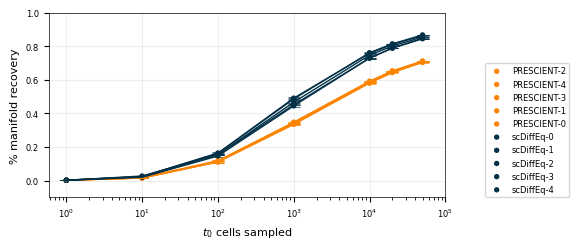

<IPython.core.display.Javascript object>

In [337]:
fig, axes = cp.plot(
    1,
    1,
    height = 0.5,
    width = 0.8,
    title = [''],
    x_label=['$t_{0}$ cells sampled'],
    y_label=['% manifold recovery'],
)
ax = axes[0]
ax.grid(alpha = 0.2)
for key, val in prescient_results.items():
    plot_manifold_recovery(ax, val, c = "#fb8500", label = f"PRESCIENT-{key}")
for key, val in sdq_results.items():
    plot_manifold_recovery(ax, val, c = "#023047", label = f"scDiffEq-{key}")
ax.set_ylim(-0.1, 1)
plt.legend(loc=(1.1, 0), fontsize = 6)
plt.savefig("percent_manifold_recovery.compared.svg", dpi = 500)

In [285]:
umap_model = sdq.io.read_pickle("./umap.pkl")
adata.obsm['X_umap'] = X_umap = umap_model.transform(adata.obsm['X_pca'])

<IPython.core.display.Javascript object>

In [307]:
N_values = [1, 10, 100, 1_000, 10_000, 20_000, 50_000]

<IPython.core.display.Javascript object>

In [308]:
nplots = ncols = len(N_values)

<IPython.core.display.Javascript object>

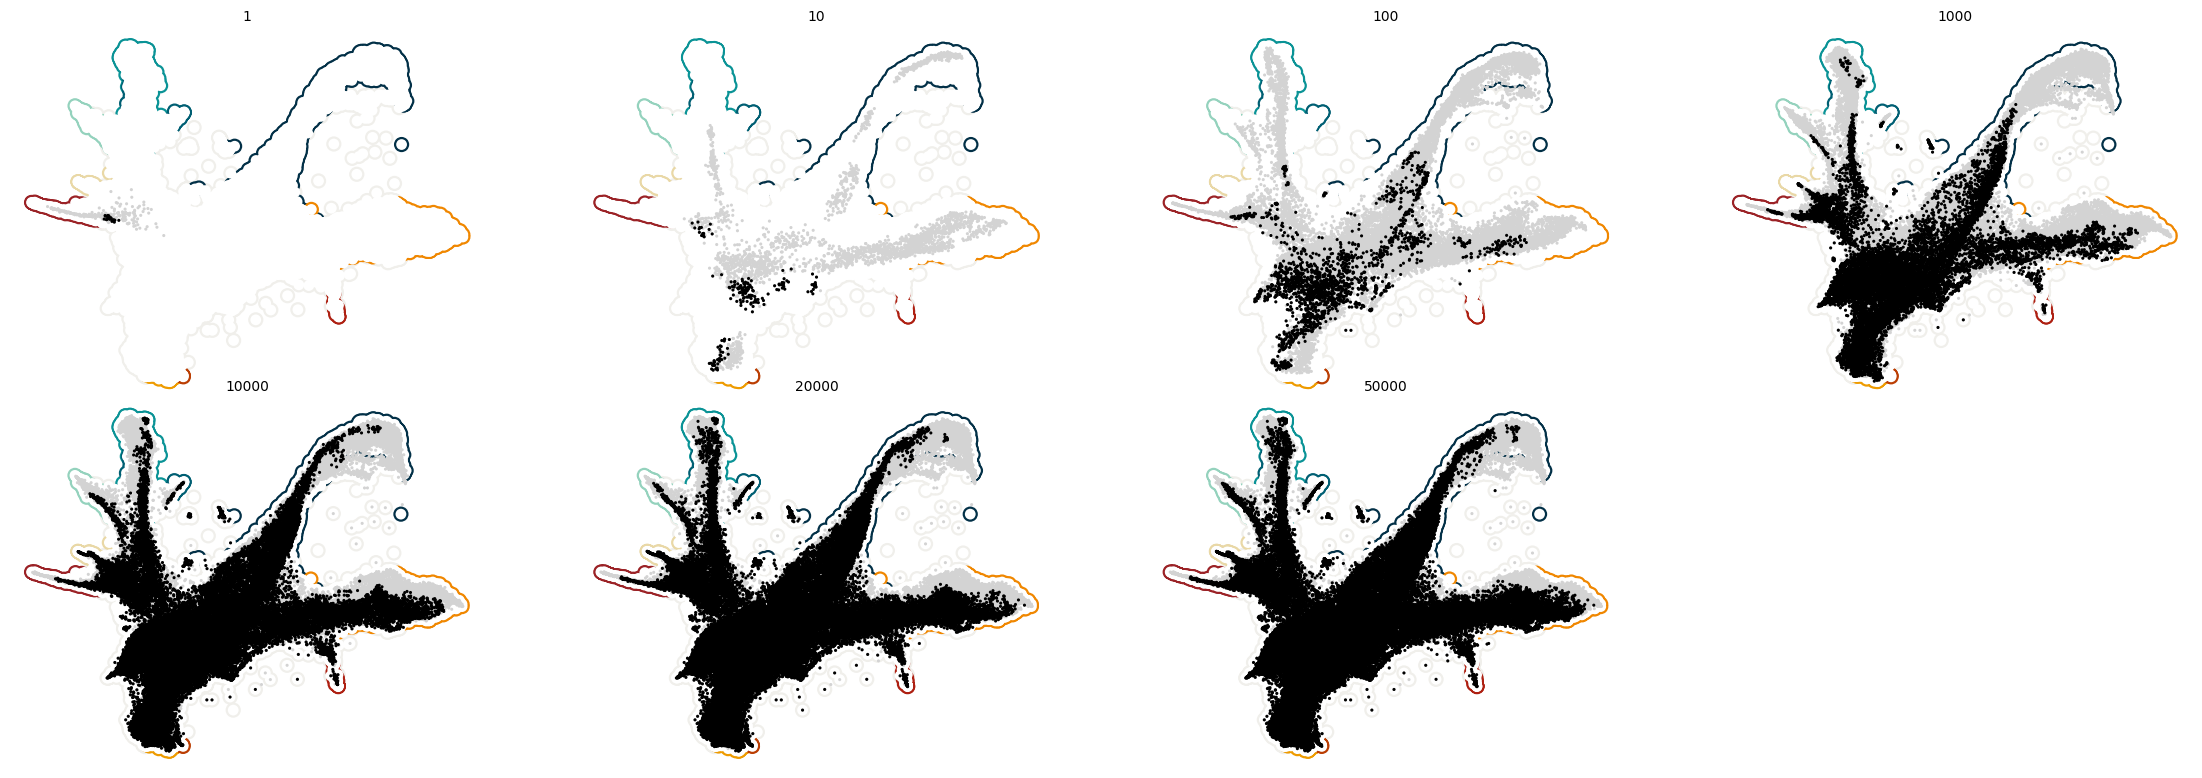

<IPython.core.display.Javascript object>

In [342]:
fig, axes = cp.plot(nplots, ncols=4, height = 1, width = 1.1, wspace = 0.2, title = N_values, del_xy_ticks=[True], delete="all")

for en, ax in enumerate(axes):
    cp.umap_manifold(adata, groupby="Cell type annotation", c_background = larry_cmap, ax = ax)
    ix = scDiffEqResults[0][0][N_values[en]]['idxs']
    xu = adata[ix].obsm['X_umap'].toarray()
    ax.scatter(xu[:,0], xu[:,1], c='lightgrey', s =5, ec = "None", zorder = 101, rasterized = True) # c = time_cmap[i]
    ix_init = scDiffEqResults[0][0][N_values[en]]['t_idxs'][0]
    xu_init = adata[ix_init].obsm['X_umap'].toarray()
    ax.scatter(xu_init[:,0], xu_init[:,1], c='k', s =5, ec = "None", zorder = 105, rasterized = True)
plt.savefig("reconstructed_emanifold.svg", dpi = 500)

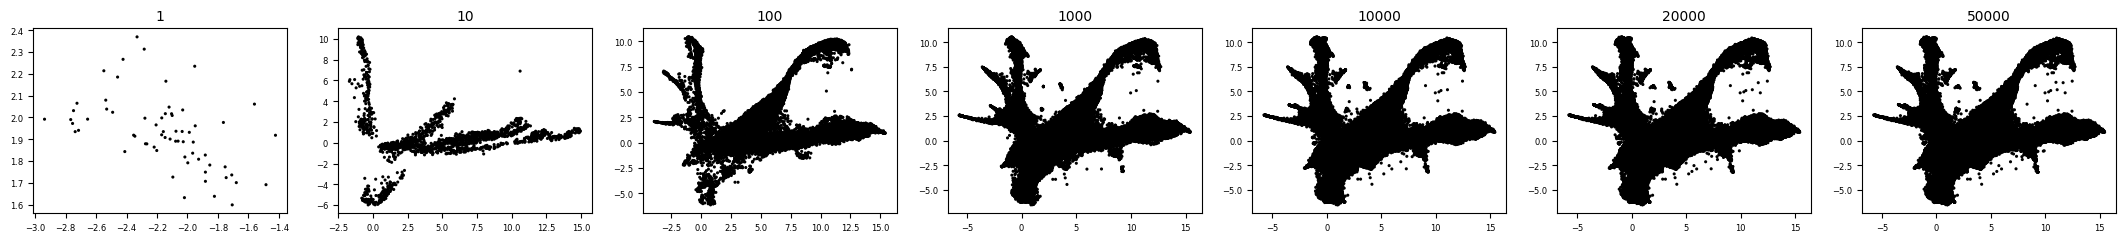

<IPython.core.display.Javascript object>

In [324]:
fig, axes = cp.plot(nplots, ncols, height = 0.5, width = 0.6, wspace = 0.2, title = N_values)

for en, ax in enumerate(axes):
    ix = PRESCIENTResults[0][0][N_values[en]]['idxs']
    xu = adata[ix].obsm['X_umap'].toarray()
    ax.scatter(xu[:,0], xu[:,1], c='k', s =5, ec = "None")

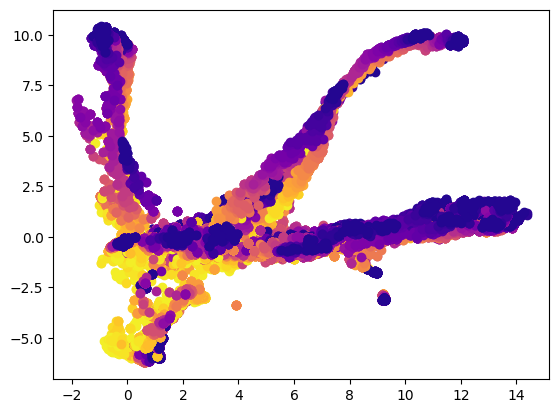

<IPython.core.display.Javascript object>

In [299]:
N = 10

for ki, vi in PRESCIENTResults.items():
    for kj, vj in vi.items():
        for en, tx in enumerate(vj[N]['t_idxs']):
            xu = adata[tx].obsm['X_umap'].toarray()
            plt.scatter(xu[:,0], xu[:,1], c = time_cmap[en])

    break

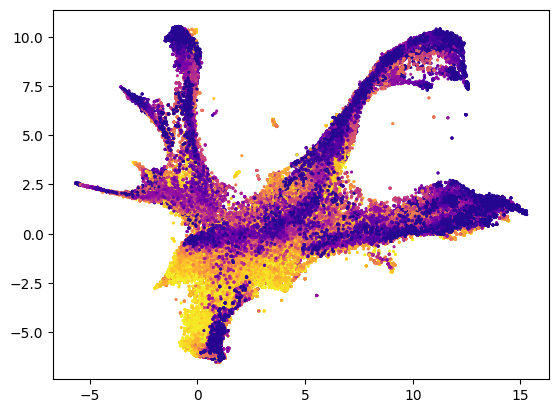

<IPython.core.display.Javascript object>

In [305]:
N = 100

for ki, vi in scDiffEqResults.items():
    for kj, vj in vi.items():
        for en, tx in enumerate(vj[N]['t_idxs']):
            xu = adata[tx].obsm['X_umap'].toarray()
            plt.scatter(xu[:,0], xu[:,1], c = time_cmap[en], s =5, ec = "None")
    break

array([[-4.7767506 ,  2.2991521 ],
       [-4.751574  ,  2.2924092 ],
       [-4.7922254 ,  2.3088753 ],
       [-4.7701173 ,  2.3060944 ],
       [-3.730114  ,  2.0308683 ],
       [-4.6966057 ,  2.2970014 ],
       [-4.7885785 ,  2.3057384 ],
       [-4.7145424 ,  2.2900527 ],
       [-2.799617  ,  2.094828  ],
       [-4.520895  ,  2.2299535 ],
       [-4.0035825 ,  2.080969  ],
       [-4.077326  ,  2.1154609 ],
       [-4.126018  ,  2.1284027 ],
       [-3.7489493 ,  2.0350966 ],
       [-4.5104537 ,  2.2310894 ],
       [-3.8782945 ,  2.0610917 ],
       [-2.4291978 ,  1.9067383 ],
       [-3.1943645 ,  1.8676742 ],
       [-2.137622  ,  1.8053168 ],
       [-1.2488801 ,  1.8713697 ],
       [-2.828694  ,  1.8808211 ],
       [-2.5772822 ,  1.9022101 ],
       [-3.6448293 ,  1.9752283 ],
       [-2.2755578 ,  1.8793008 ],
       [-1.8821764 ,  1.7493634 ],
       [-1.7083832 ,  2.1759975 ],
       [-3.407939  ,  1.9186658 ],
       [-4.627491  ,  2.25463   ],
       [-2.4494815 ,

<IPython.core.display.Javascript object>

In [ ]:
adata[]

In [274]:
scDiffEqResults[0][0].keys()

dict_keys([1, 10, 100, 1000, 10000, 20000, 50000])

<IPython.core.display.Javascript object>

In [264]:
for k, v in scDiffEqResults[0][0].items():
    break

<IPython.core.display.Javascript object>

In [268]:
v['t_idxs']

[array([ 15908,  39131,  44702,  45744,  54688,  60569,  61879,  67845,
         68890,  85905,  88351,  88586,  91275,  93300,  93787,  95807,
         97817, 103643, 123098, 127122]),
 array([ 15908,  17264,  36136,  39131,  44702,  54688,  56825,  61879,
         69108,  71160,  87339,  88586,  91275,  93889,  95807,  97817,
        103643, 108016, 117512, 127122]),
 array([ 14388,  14455,  15908,  15939,  17361,  24480,  39618,  44702,
         58515,  61879,  78999,  79602,  88414,  88586,  92662, 100930,
        108573, 110100, 116701, 127517]),
 array([ 15807,  15908,  17264,  24371,  39131,  40697,  56825,  71160,
         88871,  91275,  93889,  95050,  97406,  99011, 108016, 108653,
        110123, 111422, 117512, 127122]),
 array([  8764,  14284,  14522,  17999,  18005,  40578,  46285,  63257,
         74561,  80941,  84036,  86730,  93764,  94094,  97479,  99763,
        100789, 106842, 106967, 124968]),
 array([ 15220,  16637,  17999,  18005,  24038,  36480,  40578,  46285

<IPython.core.display.Javascript object>

In [267]:
v['Z0_idxs']

array(['15908'], dtype=object)

<IPython.core.display.Javascript object>

In [271]:
adata[v['idxs']]

View of AnnData object with n_obs × n_vars = 282 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'

<IPython.core.display.Javascript object>

In [266]:
v.keys()

dict_keys(['t_idxs', 'idxs', 'Z0_idxs'])

<IPython.core.display.Javascript object>

In [78]:
sdq_results_aggr = {int(str(key).split("_")[-1]): prepare_counts(AggrResults(val)(), adata) for key, val in scDiffEqResults.items()}
prescient_results_aggr = {key: prepare_counts(AggrResults(val)(), adata) for key, val in PRESCIENTResults.items()}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

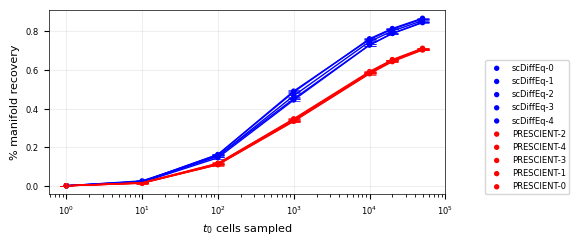

<IPython.core.display.Javascript object>

In [88]:
fig, axes = cp.plot(
    1,
    1,
    height = 0.5,
    width = 0.8,
    title = [''],
    x_label=['$t_{0}$ cells sampled'],
    y_label=['% manifold recovery'],
)
ax = axes[0]
ax.grid(alpha = 0.2)
for key, val in sdq_results_aggr.items():
    plot_manifold_recovery(ax, val, c = "b", label = f"scDiffEq-{key}")

for key, val in prescient_results_aggr.items():
    plot_manifold_recovery(ax, val, c = "r", label = f"PRESCIENT-{key}")
plt.legend(loc=(1.1, 0), fontsize = 6)
plt.savefig("percent_manifold_recovery.compared.svg", dpi = 500)

## UMAPs

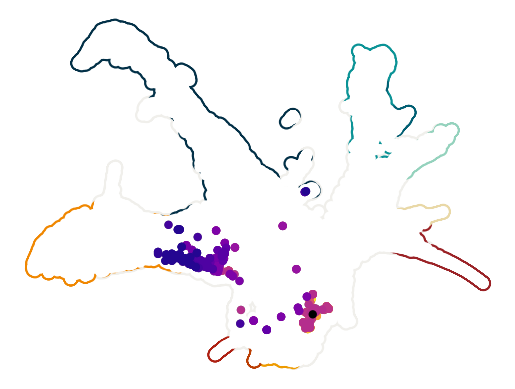

<IPython.core.display.Javascript object>

In [22]:
axes = cp.umap_manifold(adata, groupby = "Cell type annotation", c_background=larry_cmap,  alpha = 0.1, s = 2)
axes = cp.umap(adata[res['idxs']], ax = axes[0], c = "dimgrey", zorder = 101)
for en, ix in enumerate(res['t_idxs']):
    axes = cp.umap(adata[ix], c = time_cmap[en], ax = axes[0], zorder = int(205 - en))
axes = cp.umap(adata[res['Z0_idxs']], c = "k", ax = axes[0], zorder = int(305))